### Warm-up Exercises:

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

#### - Has the network latency gone up since we switched internet service providers?


- H(null) hypothesis: There's no difference or latency decreased in network speed since switching one company to the next.
    
- H(a) hypothesis: There is an increase in latency since switching from one company to the next.

- True Negative Type 1 Error example: We reject the H(null) that there is no difference of latency, when there really is.

- False Negative Type 2 Error example: We fail to reject the H(null), by saying that there is a speed difference but the reality is that we also had added 1,000 more computers to the network too and THAT was why the speed decreased...not the network. 

- True Positive: I determined that the network latency has increased and it has.

- True Negative: I determined that the network latency has decreased or is no different, and it is true.


 { This example would be determined by a <b> Paired t-test</b>.  Where we look at our data under the previous condition and then look at the sample data under the current condition } 

#### - Is the website redesign any good?

- <i>Rephrasing: What webpages are most customers engaged on and on avg, how long are they on our website?</i>

- H(null)hypothesis: There are no customers coming to the website and engaging.
    
- H(a)hypothesis: There are x amount of customers that are on our webpages an average x amount of time AND navigating throughout pages.
    
- Type 1 error example: We say "Yes, we have x amount of customers visitng for x amount of time", but find that the IP addresses vists are bots.
    
- Type 2 error example: We say "No-one is coming to our site, or the wanted engagement isn't being met" and do not take into account that we are only testing on weekend days.

- True Positive: I determined that there was an increase of number of daily visits and it has.

- True Negative: I determined that there was no change (or a decrease) in the number of daily visits and it has

{Think about the number of confounding factors that might drive changes to a websites activity beyond a simple redesign. (like when, why, how of changing a website)

Sometimes perfect comparisons are not achievable in the rapidly changing business world.

We need to understand that as data scientists, we need to NOT claim "this has increased due to ___", but rather saying "the data shows that there is a relationship that shows an increase after the website redesign"...because we really don't know the causality until further experiments.}

#### - Is our television ad driving more sales?

- <i> Rephrasing: Have we since seen an increase of sales since our tv ad has aired? How can we determine where our customers are coming from?
    
- H(null)hypothesis: There is no increase in sales since our ad aired.
    
-H(a)hypothesis: We have made x amount of sales since our ad aired date, AND we can track that the sales are directly related to the tv ad.
    
- True Negative example: I determine sales volume has stayed the same or decreased and it has.
    
- True Positive: I determine sales volume has increased and it did.
    
- Type 1 Error: I determine sales volume has increased when it actually decreased.
    
- Type 2 Error: I determine sales volume has decreased when it has actualy increased.

 ____________________________________________________

## Exercises : T-test

### Exercise One:

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
Use a .05 level of significance.

In [ ]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env

𝛼  = 0.05

#office1
mean1 = 90
sdev1 = 15
ssize1 = 40

#office2
mean2 = 100
sdev2 = 20
ssize2 = 50

### What are we comparing?

- average time (numberic continuous values)for two different groups(categories)
- One sample or two?
- One tailed or two tailed?


In [ ]:
# H_0: Average time to sell at office 1 == average time to sell at office 2
#H_a: Average time to sell at office 1 != average time to sell at office 2
t,p=stats.stats.ttest_ind_from_stats(mean1, sdev1, ssize1, mean2, sdev2, ssize2, equal_var=True)

In [ ]:
alpha = 0.05

In [ ]:
# visualize distributions

x = np.arange(50,150)

y1 = stats.norm(90, 15).pdf(x)
y1 = stats.norm(100, 20).pdf(x)



In [ ]:
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)
t,p

In [ ]:
if (p < alpha ):
    print ("We reject the null hypothesis!")
else:
    print("We accept the null hypothesis!")

### Exercise Two:
Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Are compact cars more fuel-efficient than the average car?
Do manual cars get better gas mileage than automatic cars?

In [ ]:
from pydataset import data
mpg = data('mpg')

In [ ]:
mpg

In [ ]:
#H_0: There is no difference in fuel efficiency in cars from 2008 and 1999
#H-a: There is a difference in fuel efficiency in cars from 2008 and 1999

In [ ]:
How should we measure "fuel-efficiency"?
Two approaches:
    - Run two ttests: one for highway and one for city
    - 

In [ ]:
mpg

In [ ]:
#getting two ojects based on year
cars_2008 = mpg[mpg.year == 2008]
cars_1999 = mpg[mpg.year == 1999]

In [ ]:
cars_1999.hist()

In [ ]:
#finding the average number of hwy & cty combined

avg_hwy= mpg.hwy.mean()

avg_cty = mpg.cty.mean()

avg_mpg = avg_hwy + avg_cty

avg_mpg

In [ ]:
combined_mpg= mpg.hwy + mpg.cty

In [ ]:
#new column for combined mpg
mpg['Combined MPG'] = mpg.hwy + mpg.cty
mpg

In [ ]:
#find 2008 fuel efficient cars (above the avg mpg)
cars_2008 = mpg[(mpg.year == 2008) & (mpg['Combined MPG'] >= 40)]
cars_2008['Combined MPG'].value_counts()

In [ ]:
cars_1999 = mpg[(mpg.year == 1999) & (mpg['Combined MPG'] >= 40)]

In [ ]:
cars_1999.var(), cars_2008.var()

In [ ]:
t, p = stats.ttest_ind(cars_1999, cars_2008, equal_var= True)

## Correlation Exercises:

### Exercise 1)
Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
import scipy.stats as stats
df = pd.read_csv("Copy of Jennifer Eyring - jemison_spreadsheet_exercises - Table1_Copy.csv")

In [26]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_phone_internet,partner_dependants,avg_monthly_charges,validate,phone_service_type,Internet Service,Contract Type,rounded_tenure,Service Type,Tenure Bins
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,...,True,3,65.6,TRUE,One Line,DSL,1 Year,9.0,Internet + Phone,NaN
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,...,True,0,59.9,TRUE,Two or More Lines,DSL,Month-to-Month,9.0,Internet + Phone,NaN
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,...,True,0,73.9,TRUE,One Line,Fiber Optic,Month-to-Month,4.0,Internet + Phone,NaN
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,...,True,1,98,TRUE,One Line,Fiber Optic,Month-to-Month,13.0,Internet + Phone,NaN
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,...,True,1,83.9,TRUE,One Line,Fiber Optic,Month-to-Month,3.0,Internet + Phone,NaN


In [27]:
#renamed to call on later
df=df.rename(columns={"Service Type": "service_type"})
df

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_phone_internet,partner_dependants,avg_monthly_charges,validate,phone_service_type,Internet Service,Contract Type,rounded_tenure,service_type,Tenure Bins
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,...,True,3,65.6,TRUE,One Line,DSL,1 Year,9.0,Internet + Phone,NaN
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,...,True,0,59.9,TRUE,Two or More Lines,DSL,Month-to-Month,9.0,Internet + Phone,NaN
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,...,True,0,73.9,TRUE,One Line,Fiber Optic,Month-to-Month,4.0,Internet + Phone,NaN
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,...,True,1,98,TRUE,One Line,Fiber Optic,Month-to-Month,13.0,Internet + Phone,NaN
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,...,True,1,83.9,TRUE,One Line,Fiber Optic,Month-to-Month,3.0,Internet + Phone,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,...,True,0,55.15,TRUE,One Line,DSL,1 Year,13.0,Internet + Phone,NaN
7045,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,...,True,1,85.1,TRUE,Two or More Lines,Fiber Optic,Month-to-Month,22.0,Internet + Phone,NaN
7046,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,...,True,0,50.3,TRUE,One Line,DSL,Month-to-Month,2.0,Internet + Phone,NaN
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,...,True,2,67.85,TRUE,One Line,DSL,2 Year,68.0,Internet + Phone,NaN


### Does Tenure relate to Monthly Charges?

H0: There is no relation to Monthly charges and tenure
Ha: There is a relation to Monthly charges and tenure

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

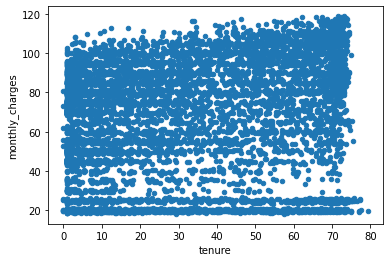

In [28]:
df.plot.scatter(y='monthly_charges', x='tenure')

In [47]:
alpha = 0.05

In [48]:
x = df.tenure
y = df.monthly_charges

In [49]:
r, p = stats.pearsonr(x,y)
r,p

(0.24718489224989926, 1.2811368994964528e-98)

<b> Conclusion: There is a weak relationship between monthly charges and tenure but it is there.
- Reject the null hypothesis</b>

In [53]:
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to rejcet the null hypothesis')

Reject the null hypothesis


### Does Tenure relate to Total Charges?

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

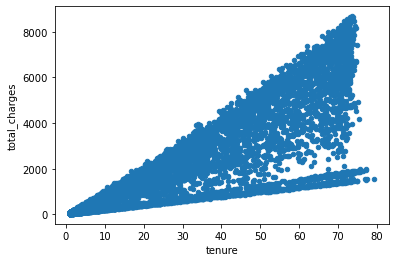

In [31]:
df.plot.scatter(y='total_charges', x='tenure')
#visually, yes it looks like there might be a relationship between total and tenure

In [55]:
x = df.tenure
y = df.total_charges
#to drop nulls, look at spaces needing to be replaced,drop na mehtod (subset dataframe for two variables)

In [33]:
##cleaning data for any spaces...
df['tenure']= df.tenure.replace(' ',np.nan)
df['total_charges']= df.total_charges.replace(" ",np.nan)

In [34]:
df_xy=df[['tenure','total_charges','service_type']].dropna()
df_xy

,tenure,total_charges,service_type
0,9.0,593.30,Internet + Phone
1,9.1,542.40,Internet + Phone
2,3.8,280.85,Internet + Phone
3,12.6,1237.85,Internet + Phone
4,3.2,267.40,Internet + Phone
...,...,...,...
7044,13.5,742.90,Internet + Phone
7045,22.0,1873.70,Internet + Phone
7046,1.8,92.75,Internet + Phone
7047,68.2,4627.65,Internet + Phone


In [35]:
x=df_xy.tenure
y=df_xy.total_charges

In [36]:
r, p = stats.pearsonr(x,y)
r,p

(0.8258191824783676, 0.0)

#### Conclusion: There is a strong positive correlation between tenure and total_charges

In [56]:
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to rejcet the null hypothesis')

Reject the null hypothesis


### What happens if I control for phone and internet service?

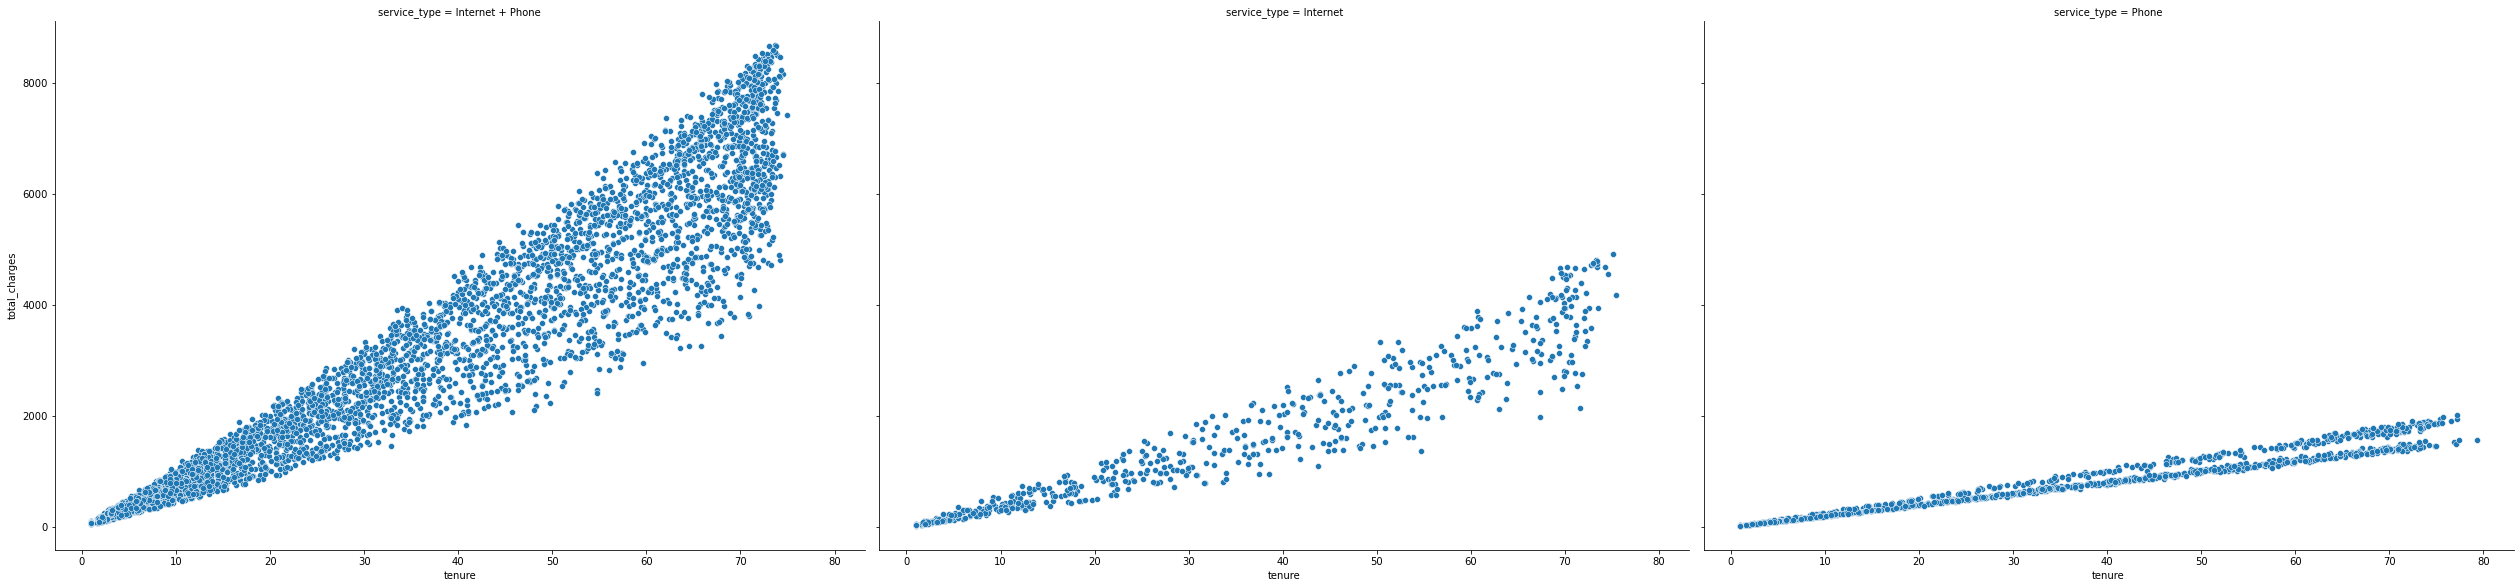

In [37]:
sns.relplot(data=df_xy, y='total_charges', x='tenure', col='service_type',height=8.27, aspect=11.7/8.27)

In [38]:
df_xy.value_counts('service_type')

service_type
Internet + Phone    4834
Phone               1523
Internet             681
dtype: int64

In [39]:
phone=df_xy[df_xy.service_type == 'Phone']
Internet=df_xy[df_xy.service_type == 'Internet']

In [40]:
r, p = stats.pearsonr(phone.tenure, phone.total_charges)
print('Phone Customers')
print('  r =', r)
print('  p =', p)

Phone Customers
  r = 0.9843017870543525
  p = 0.0


In [41]:
r, p = stats.pearsonr(Internet.tenure, Internet.total_charges)
print('Internet Customers')
print('  r =', r)
print('  p =', p)

Internet Customers
  r = 0.9543062640520065
  p = 0.0


### Exercise 2)

In [19]:
import pandas as pd
import env
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

salaries = pd.read_sql('SELECT * FROM salaries', url)
titles = pd.read_sql('SELECT * FROM titles', url)
employees = pd.read_sql('SELECT * FROM employees', url)

Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?

In [21]:
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [22]:
df_salary = pd.concat([salaries, employees])
df_salary

,emp_no,salary,from_date,to_date,birth_date,first_name,last_name,gender,hire_date
0,10001,60117.0,1986-06-26,1987-06-26,NaN,NaN,NaN,NaN,NaN
1,10001,62102.0,1987-06-26,1988-06-25,NaN,NaN,NaN,NaN,NaN
2,10001,66074.0,1988-06-25,1989-06-25,NaN,NaN,NaN,NaN,NaN
3,10001,66596.0,1989-06-25,1990-06-25,NaN,NaN,NaN,NaN,NaN
4,10001,66961.0,1990-06-25,1991-06-25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
300019,499995,NaN,NaN,NaN,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,NaN,NaN,NaN,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,NaN,NaN,NaN,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,NaN,NaN,NaN,1956-09-05,Patricia,Breugel,M,1993-10-13


In [45]:
df_salary = df_salary['hire_date']= df_salary.hire_date.replace('NaN',0)
df_salary=df_salary[['hire_date']].dropna()

In [46]:
df_salary.head()

RecursionError: maximum recursion depth exceeded in __instancecheck__

- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [4]:
#Combining tables into one dataframe
df_jobs = pd.concat([salaries, titles])
df_jobs

,emp_no,salary,from_date,to_date,title
0,10001,60117.0,1986-06-26,1987-06-26,NaN
1,10001,62102.0,1987-06-26,1988-06-25,NaN
2,10001,66074.0,1988-06-25,1989-06-25,NaN
3,10001,66596.0,1989-06-25,1990-06-25,NaN
4,10001,66961.0,1990-06-25,1991-06-25,NaN
...,...,...,...,...,...
443303,499997,NaN,1987-08-30,1992-08-29,Engineer
443304,499997,NaN,1992-08-29,9999-01-01,Senior Engineer
443305,499998,NaN,1998-12-27,9999-01-01,Senior Staff
443306,499998,NaN,1993-12-27,1998-12-27,Staff


In [ ]:
df_jobs['tenure']= df.tenure.replace(' ',np.nan)

In [5]:
#adding a new column for titles
df_jobs["title_count"] = df_jobs["title"]
df_jobs.head()

,emp_no,salary,from_date,to_date,title,title_count
0,10001,60117.0,1986-06-26,1987-06-26,NaN,NaN
1,10001,62102.0,1987-06-26,1988-06-25,NaN,NaN
2,10001,66074.0,1988-06-25,1989-06-25,NaN,NaN
3,10001,66596.0,1989-06-25,1990-06-25,NaN,NaN
4,10001,66961.0,1990-06-25,1991-06-25,NaN,NaN


In [10]:
#realized I need to clean up the NaNs:
df_jobs['title']= df_jobs.title.replace('NaN',np.nan)
df_jobs=df_jobs[['title']].dropna()
df_jobs

,title


In [ ]:
#title_salary = pd.concat[salaries,titles]

#salaries['salary_count']= titles['title'].nunique(axis=1)

#title_salary